# Hands-on exercise

In this simple example you are required to perform a simple linear regression with scipy. Find all the information on the function in the documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

In [1]:
import matplotlib.pyplot as plt
import csv
from scipy import stats
import numpy as np
import sklearn as sl
from sklearn.linear_model import LinearRegression

In [4]:
! cat data/km_year_power_price.csv

In [11]:
# Load the provided .csv file with the used car data

filename = "data/km_year_power_price.csv"
lines = csv.reader(open(filename, newline=''), delimiter=',')

# place your loading code here
data = []
for i in list(lines)[1:]:
    data.append([float(x) for x in i])
data = np.array(data)
km = data[:,0]
year = data[:,1]
power = data[:,2]
price = data[:,3]

Use a linear regression to estimate the car prices from the year, kilometers or engine power. 
You can make a simple 1D regression from each one of the parameters independently 




intercept = -3018309.48495689
slope = 1509.0938253351871
correlation = 0.6767043169095365


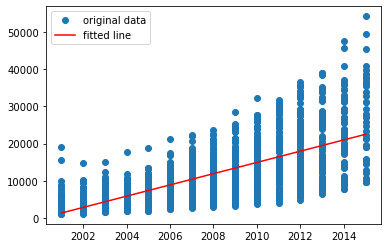

In [62]:
# linear regression with linregress (estimate price from year)
slope, intercept, rval, _, _ = stats.linregress(year, price)
plt.plot(year, price, 'o', label='original data')
plt.plot(year, intercept + slope*year, 'r', label='fitted line')
plt.legend()
print('intercept =',intercept)
print('slope =', slope)
print('correlation =', rval)

[   0.         1509.09382534]


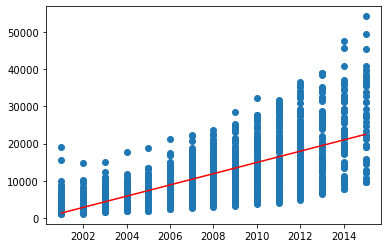

In [53]:
# (Optional) linear regression with linear_model.LinearRegression() (estimate price from year)
x = np.array([(1,i) for i in year])
reg = LinearRegression()
reg.fit(x, price)
y_predict = reg.predict(x)
print(reg.coef_)
plt.scatter(year, price)
plt.plot(year, y_predict, color='red')

intercept = -3018309.484834671
slope = 1509.09382527438


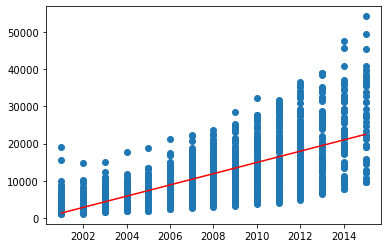

In [57]:
# linear regression with least squares (estimate price from year)
# You should get exactly the same solution of linregress !
x = np.array([(1,i) for i in year])
b = np.array([0.,0.])
A = np.array([[0.,0.],[0.,0.]])
for i,j in zip(x,price):
    b += i*j
    A += np.outer(i,i)
Ainv = np.linalg.inv(A)
w = np.dot(Ainv,b)
print('intercept =', w[0])
print('slope =', w[1])
plt.scatter(year,price)
plt.plot(year, np.dot(x,w), color='red')

intercept = -1303.9126989879514
slope = 90.33080718820203
correlation = 0.7085500315263955


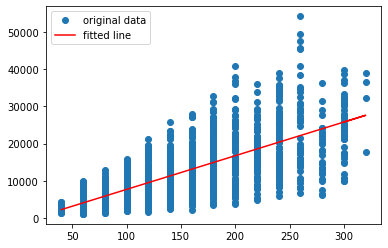

In [61]:
# linear regression with linregress (estimate price from power)

slope, intercept, rval, _, _ = stats.linregress(power, price)
plt.plot(power, price, 'o', label='original data')
plt.plot(power, intercept + slope*power, 'r', label='fitted line')
plt.legend()
print('intercept =',intercept)
print('slope =', slope)
print('correlation =', rval)

intercept = 16692.345302519756
slope = -0.05425151330972588
correlation = -0.2572867429988502


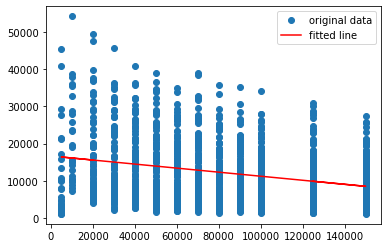

In [60]:
# linear regression with linregress (estimate price from km)

slope, intercept, rval, _, _ = stats.linregress(km, price)
plt.plot(km, price, 'o', label='original data')
plt.plot(km, intercept + slope*km, 'r', label='fitted line')
plt.legend()
print('intercept =',intercept)
print('slope =', slope)
print('correlation =', rval)

In [ ]:
# Have a look at the correlation coefficients to see which of the 3 features works better

# power

[   0.         1325.2284004    80.43004469]


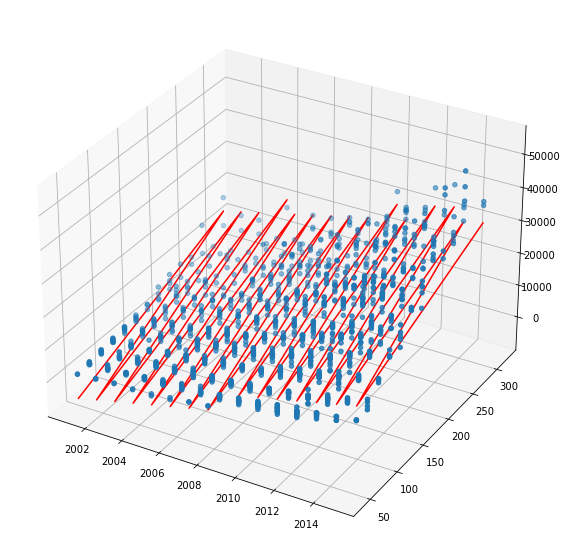

In [76]:
# Optional : 2D linear regression with linear model (estimate price from year and power)
x = np.array([(1,i,j) for i,j in zip(year, power)])
reg = LinearRegression()
reg.fit(x, price)
y_predict = reg.predict(x)
print(reg.coef_)
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.scatter(year, power, price)
ax.plot(year, power, y_predict, color='red')
#ax.view_init(elev=20., azim=-35)